In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import activations

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
# for 2nd attempt
from keras.initializers import glorot_uniform
from keras.callbacks import EarlyStopping

import keras.backend as K

Using TensorFlow backend.


In [2]:
# let's choose a simple 1->1 function to train
def f(x):
    return np.sin(x)**2

In [3]:
# check it works...
print(f(np.pi/2))

1.0


In [4]:
# evaluate some data points
datasize = 5000
datapoints = np.random.uniform(low=-2, high=2, size=(datasize,))
datavalues = np.array(list(map(f, datapoints)))
data = np.transpose([datapoints,datavalues])
# instead of random.uniform one could have generated a set of sequential points
# using np.arange(-2,2,<step size>), does it affect the performance?

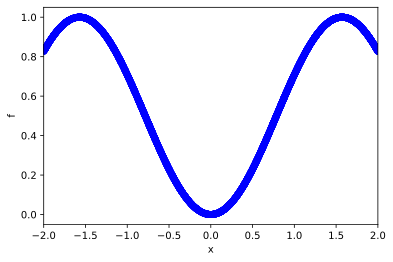

In [5]:
# plot the data points to see how they are distributed
plt.plot(datapoints, datavalues, 'bo')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

In [6]:
# use Mean Squared Error (MSE) for the loss function
def MSE(y_pred,y_true):
    return K.mean(K.square(y_pred - y_true))

In [7]:
# Initialise model: 1-N-1
hiddenlayerdepth = 4
model = Sequential()
## input layer
model.add(Dense(1, input_dim=1))
model.add(Activation(activations.sigmoid))
## hidden layer
model.add(Dense(hiddenlayerdepth))
model.add(Activation(activations.sigmoid))
## output layer
model.add(Dense(1))
model.add(Activation(activations.sigmoid))

# Compile model
## lr - learningrate
## beta1, beta2, amsgrad : parameters for adaptive gradient descent
## see lecture 4 on optimisation
model.compile(
    optimizer = Adam(lr=0.1, beta_1=0.9, beta_2=0.999, amsgrad=False),
    loss=MSE)

In [8]:
# demonstration of how to take slices of numpy arrays
print(data[0:2,0])
print(data[0:2,1])
print(f(1.20030495))

[ 1.64537544 -1.0862488 ]
[0.99444826 0.78302289]
0.8689027716812022


In [9]:
## split into testing and training sets
len(data)
split = int(len(data)*80/100)

In [10]:
model.fit(
    data[0:split,0],
    data[0:split,1],
    epochs=300,
    validation_data=(data[split:,0], data[split:,1])
)

Train on 4000 samples, validate on 1000 samples
Epoch 1/300
4000/4000 [==============================] - 1s 225us/step - loss: 0.1039 - val_loss: 0.1029
Epoch 2/300
4000/4000 [==============================] - 0s 63us/step - loss: 0.0942 - val_loss: 0.1019
Epoch 3/300
4000/4000 [==============================] - 0s 65us/step - loss: 0.0942 - val_loss: 0.0997
Epoch 4/300
4000/4000 [==============================] - 0s 61us/step - loss: 0.0942 - val_loss: 0.1000
Epoch 5/300
4000/4000 [==============================] - 0s 60us/step - loss: 0.0942 - val_loss: 0.1036
Epoch 6/300
4000/4000 [==============================] - 0s 60us/step - loss: 0.0946 - val_loss: 0.1004
Epoch 7/300
4000/4000 [==============================] - 0s 57us/step - loss: 0.0942 - val_loss: 0.0997
Epoch 8/300
4000/4000 [==============================] - 0s 57us/step - loss: 0.0940 - val_loss: 0.1021
Epoch 9/300
4000/4000 [==============================] - 0s 59us/step - loss: 0.0943 - val_loss: 0.1026
Epoch 10/300
40

4000/4000 [==============================] - 0s 53us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 79/300
4000/4000 [==============================] - 0s 56us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 80/300
4000/4000 [==============================] - 0s 63us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 81/300
4000/4000 [==============================] - 0s 54us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 82/300
4000/4000 [==============================] - 0s 53us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 83/300
4000/4000 [==============================] - 0s 53us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 84/300
4000/4000 [==============================] - 0s 54us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 85/300
4000/4000 [==============================] - 0s 51us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 86/300
4000/4000 [==============================] - 0s 51us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 87/300
4000/4000 [==============================] - 0s 49us/st

4000/4000 [==============================] - 0s 53us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 156/300
4000/4000 [==============================] - 0s 50us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 157/300
4000/4000 [==============================] - 0s 51us/step - loss: 0.0013 - val_loss: 0.0027
Epoch 158/300
4000/4000 [==============================] - 0s 53us/step - loss: 0.0014 - val_loss: 0.0011
Epoch 159/300
4000/4000 [==============================] - 0s 53us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 160/300
4000/4000 [==============================] - 0s 54us/step - loss: 0.0012 - val_loss: 0.0010
Epoch 161/300
4000/4000 [==============================] - 0s 55us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 162/300
4000/4000 [==============================] - 0s 54us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 163/300
4000/4000 [==============================] - 0s 53us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 164/300
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 58us/step - loss: 0.0011 - val_loss: 9.8479e-04
Epoch 232/300
4000/4000 [==============================] - 0s 56us/step - loss: 0.0011 - val_loss: 9.6908e-04
Epoch 233/300
4000/4000 [==============================] - 0s 53us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 234/300
4000/4000 [==============================] - 0s 52us/step - loss: 0.0011 - val_loss: 9.4131e-04
Epoch 235/300
4000/4000 [==============================] - 0s 56us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 236/300
4000/4000 [==============================] - 0s 59us/step - loss: 0.0011 - val_loss: 9.6388e-04
Epoch 237/300
4000/4000 [==============================] - 0s 56us/step - loss: 0.0016 - val_loss: 0.0010
Epoch 238/300
4000/4000 [==============================] - 0s 56us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 239/300
4000/4000 [==============================] - 0s 55us/step - loss: 0.0011 - val_loss: 9.9279e-04
Epoch 240/300
4000/4000 [===============

In [11]:
print(model.predict([1]))
print(f(1))

print(model.predict([0.1]))
print(f(0.1))

[[0.6639479]]
0.7080734182735712
[[0.0299581]]
0.009966711079379185


In [12]:
datapoints2 = np.random.uniform(low=-2, high=2, size=(1000,))
datavalues2 = np.array(list(map(f, datapoints2)))
datavaluespred = model.predict(datapoints2)

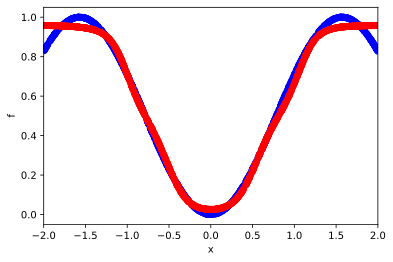

In [13]:
plt.plot(datapoints2, datavalues2, 'bo')
plt.plot(datapoints2, datavaluespred, 'ro')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

In [14]:
# try again with some more bells and whistles

In [15]:
### taken from stackoverflow
class SelectiveProgbarLogger(tf.keras.callbacks.ProgbarLogger):
    def __init__(self, verbose, epoch_interval, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.default_verbose = verbose
        self.epoch_interval = epoch_interval
    
    def on_epoch_begin(self, epoch, *args, **kwargs):
        self.verbose = (
            0 
                if epoch % self.epoch_interval != 0 
                else self.default_verbose
        )
        super().on_epoch_begin(epoch, *args, **kwargs)

In [16]:
# Initialise model
model2 = Sequential()
## input layer
model2.add(Dense(1, input_dim=1))
model2.add(Activation(activations.sigmoid))
## hidden layers
model2.add(Dense(16))
model2.add(Activation(activations.sigmoid))
# hidden layers
model2.add(Dense(16))
model2.add(Activation(activations.sigmoid))
## output layer
model2.add(Dense(1))
model2.add(Activation(activations.sigmoid))

# Compile model
model2.compile(
    optimizer = Adam(lr=0.1, beta_1=0.9, beta_2=0.999, amsgrad=False),
    loss=MSE)

In [17]:
ES = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=100,
    verbose=0,
    restore_best_weights=True)

model2.fit(
    data[0:split,0],
    data[0:split,1],
    epochs=500,
    validation_data=(data[split:,0], data[split:,1]),
    callbacks=[SelectiveProgbarLogger(verbose = 1, epoch_interval = 100), ES],
    batch_size=128,
    verbose=0
)

Epoch 1/500
4000/4000 [==============================] - 1s 289us/sample - loss: 0.1412 - val_loss: 0.1256
Epoch 101/500
4000/4000 [==============================] - 0s 24us/sample - loss: 0.0937 - val_loss: 0.0996
Epoch 201/500
4000/4000 [==============================] - 0s 25us/sample - loss: 8.7225e-04 - val_loss: 7.9627e-04
Epoch 301/500
4000/4000 [==============================] - 0s 25us/sample - loss: 4.5253e-04 - val_loss: 4.4972e-04
Epoch 401/500
4000/4000 [==============================] - 0s 24us/sample - loss: 2.2838e-05 - val_loss: 2.1158e-05


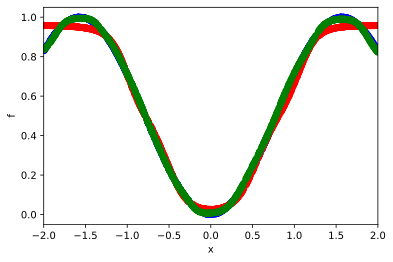

In [18]:
datavaluespred2 = model2.predict(datapoints2)

plt.plot(datapoints2, datavalues2, 'bo')
plt.plot(datapoints2, datavaluespred, 'ro')
plt.plot(datapoints2, datavaluespred2, 'go')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');